# InstaCart Project 

## Ex4.9  Part 2 - Python Visualisations

### Contents
- 1. Import libraries and orders_products_customers_merged df
- 2. Histogram of 'order_hour_of_day'
- 3. Bar show showing orders by customer loyalty
- 4. Create representative sample to use for line graph containing 'prices'
- 5. Create line chart showing prices over hour_of_day
- 6. Determine correlation between age and family status 
- 7. Is there a correlation between age and spending power?

# 01 Import libraries and dataframe

In [2]:
# Importing Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create file path

path = r'//Users/amypalomino/Documents/(03.22) InstaCart Basket Analysis'

In [4]:
# Import new df ords_prods_custs as df

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
df.shape

(32435059, 32)

In [6]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,No_of_dependants,Family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df.describe()

,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_order_frequency,Age,No_of_dependants,income
count,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.035696e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07
mean,1.710748e+06,1.714195e+01,2.738815e+00,1.342498e+01,1.110414e+01,2.557635e+04,8.351081e+00,5.896955e-01,7.119612e+01,9.919792e+00,7.789986e+00,3.305231e+01,7.789940e+00,1.039779e+01,4.946512e+01,1.501877e+00,9.943550e+04
std,9.873006e+05,1.753496e+01,2.090051e+00,4.246357e+00,8.778941e+00,1.409657e+04,7.126656e+00,4.918889e-01,3.821139e+01,6.281485e+00,4.242231e+00,2.515463e+01,7.348567e-01,7.131238e+00,1.848555e+01,1.118869e+00,4.305540e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559430e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353200e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.377451e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700200e+04
50%,1.711047e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811012e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661200e+04
75%,2.565514e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.228509e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279080e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# 02 Histogram of 'order_hour_of_day'

<AxesSubplot:ylabel='Frequency'>

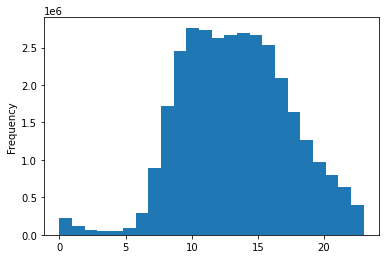

In [8]:
# Create histogram to show orders throughout day. Will use 24 bins for the 24 hour timeframe

df['order_hour_of_day'].plot.hist(bins = 24)

 - Histrogram clearly shows the most popular hours fro placing orders fall between 9am and 4pm
 - Orders gradually decline from late afternoon through to 11pm
 - There are very few orders placed overnight

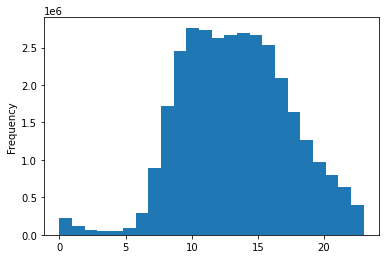

In [9]:
# Create object of chart

hist_ords_hours = df['order_hour_of_day'].plot.hist(bins = 24)

In [10]:
# Export Chart to Visualisation folder

hist_ords_hours.figure.savefig(os.path.join(path, '04 Analysis', 'Visulaisations', 'hist_ords_hours.png'))

# 03 Bar show showing orders by customer loyalty

In [13]:
# Get column names 

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'High/Low_Spender', 'median_order_frequency', 'Order_frequency_flag',
       'First Name', 'Surname', 'Gender', 'State', 'Age', 'date_joined',
       'No_of_dependants', 'Family_status', 'income'],
      dtype='object')

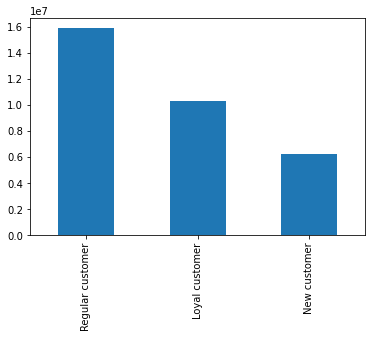

In [14]:
# Create bar chart showing frequency of orders by loyalty flag 

bar_loyalty_ords = df['loyalty_flag'].value_counts().plot.bar()

In [15]:
# Export chart to folder 

bar_loyalty_ords.figure.savefig(os.path.join(path, '04 Analysis', 'Visulaisations', 'bar_loyalty_ords.png'))

# 04 Create representative sample to use for line graph containing 'prices'

In [16]:
# Set the seed for the random number generator as 4
np.random.seed(4)

In [17]:
# Create a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [18]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [19]:
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [20]:
len(df)

32435059

In [21]:
len(big) + len(small)

32435059

# 05 Create line chart showing prices over hour_of_day

In [22]:
# Reduce columns to only those required for chart using small df
df_2 = small[['order_hour_of_day','prices']]

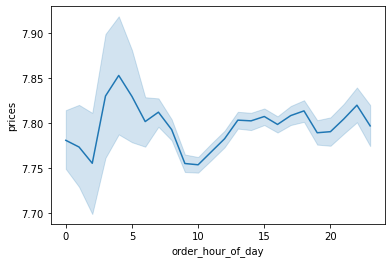

In [23]:
line_price_hour = sns.lineplot(data = df_2, 
                   x = 'order_hour_of_day',
                   y = 'prices')

In [26]:
# Export chart to folder

line_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visulaisations', 'line_price_hour'))

# 06 Determine correlation between age and family status 

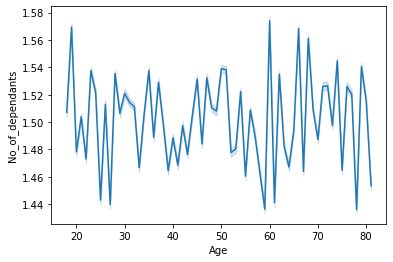

In [27]:
line_age_fam = sns.lineplot(data = df, 
                   x = 'Age',
                   y = 'No_of_dependants')

- The line chart shows there is no correlation between these 2 variables.
- Is the no_of_dependants an average of all rows in that age group?!
- I'm not sure this type of chart is the best choice for determining the relationship though. I wonder if a scatterplot might do a better job? 

In [28]:
# Export chart to folder

line_age_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visulaisations', 'line_age_fam'))

In [29]:
df_3 = small[['Age', 'No_of_dependants']]

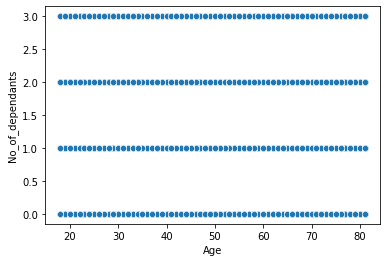

In [30]:
scat_age_fam = sns.scatterplot(x = 'Age',
                               y = 'No_of_dependants',
                               data = df_3)

- This is not what I was expecting but on reflection, it makes sense, of course... In wich case, I would probably try to make a bar chart but I wonder if I could use the age to create some groups, like 18-24, 25-34 etc. 

# 07 Is there a correlation between age and spending power?

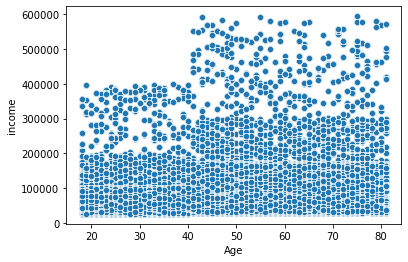

In [43]:
scat_age_income = sns.scatterplot(x = 'Age',
                                  y = 'income',
                                  data = df)

- There does appear to be a reasonable correlation between age and spending power. 
- Based on this chart, no-one below the age of 40 has a salary that exceeds $400,000

In [44]:
# Export chart to folder

scat_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visulaisations', 'scat_age_income'))